In [2]:
import pandas as pd
import numpy as np

### Question 1: Table Join
write a SQL query for a report that provides the following information for each person in the Person table, regardless if there is an address for each of those people:\

`FirstName, LastName, City, State`

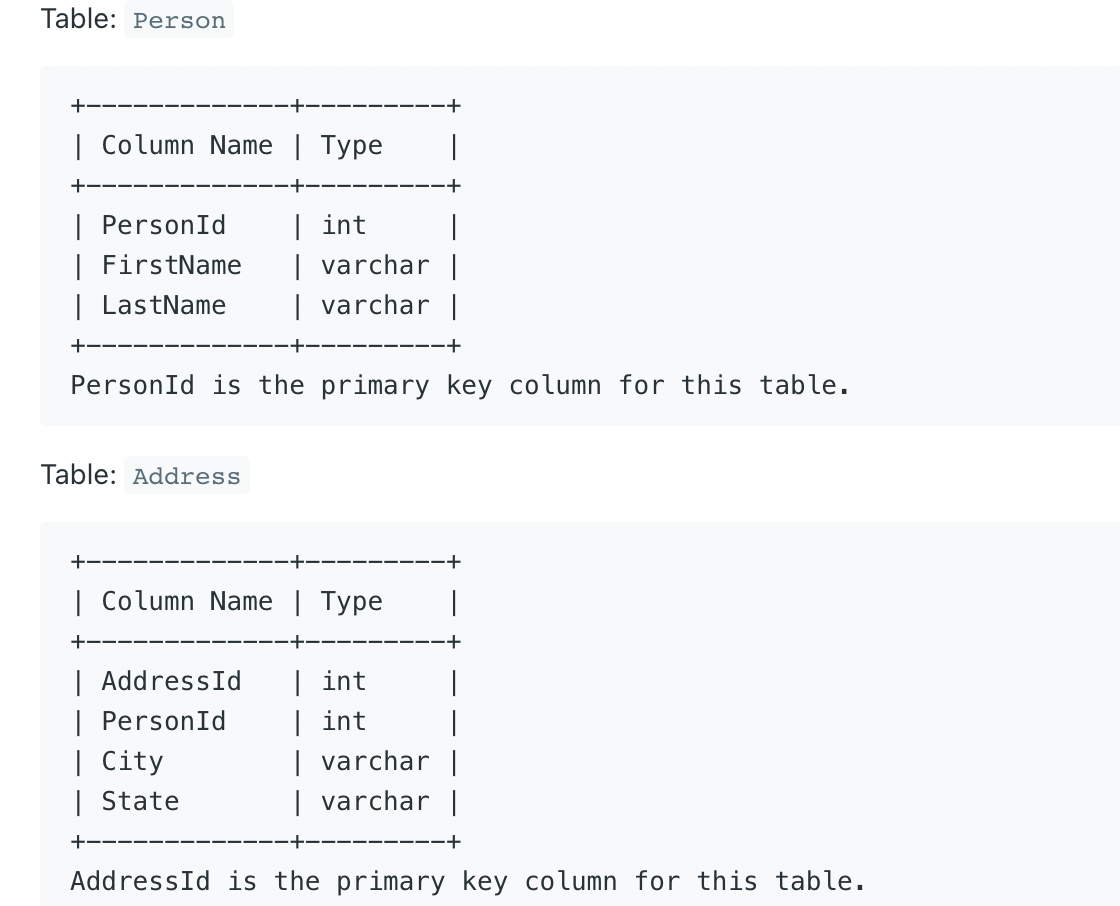

In [3]:
Person = pd.DataFrame({"PersonId":[1,2,3,4,5],
                      "FirstName":["Jack","Ray","July","June","Jay"],
                      "LastName":["Simon","Li","Sun","Xiao","rio"]})
Address = pd.DataFrame({"AddressId":[101,102,103,104,105],
                       "PersonId":list(range(1,6)),
                       "City":["New York","Rochester","Texas","Austin","Chicago"],
                       "State":["New York","New York","Texas","Ohio","Txas"]})

In [4]:
# now use python to merge the two tables and query the required fields
merged_df = pd.merge(Person,Address,on="PersonId").loc[:,["FirstName","LastName","City","State"]]
merged_df

,FirstName,LastName,City,State
0,Jack,Simon,New York,New York
1,Ray,Li,Rochester,New York
2,July,Sun,Texas,Texas
3,June,Xiao,Austin,Ohio
4,Jay,rio,Chicago,Txas


### Questions 2: Second Highest Salary

Write a SQL query to get the second highest salary from the `Employee` table.

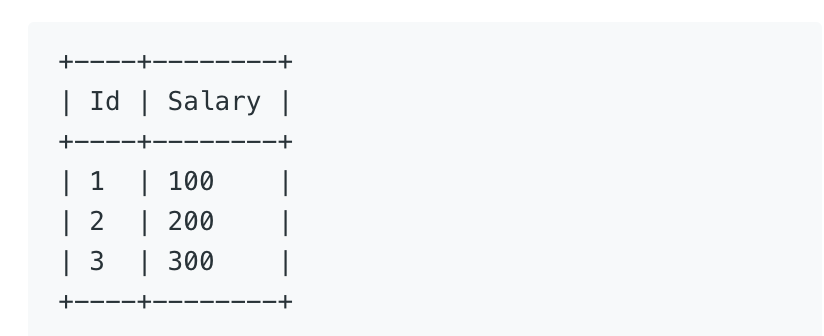

For example, given the above Employee table, the query should return 200 as the second highest salary. If there is no second highest salary, then the query should return null.



In [5]:
Employee = pd.DataFrame({"Id":[1,2,3],
             "Salary":[100,200,300]})
Employee

,Id,Salary
0,1,100
1,2,200
2,3,300


In [6]:
# wirte a function to return the nth highest salary
def top_NthHighestSalry(df,column="Salary",n=2):
    nth_sal = df.sort_values(by=column).iloc[-n]["Salary"]
    return pd.DataFrame({"SecondHighestSalary":[nth_sal]})

In [7]:
top_NthHighestSalry(Employee)

,SecondHighestSalary
0,200


In [8]:
top_NthHighestSalry(Employee,n=1)

,SecondHighestSalary
0,300


### Question3: Rank Scores

Write a SQL query to rank scores. If there is a tie between two scores, both should have the same ranking. Note that after a tie, the next ranking number should be the next consecutive integer value. In other words, there should be no "holes" between ranks.

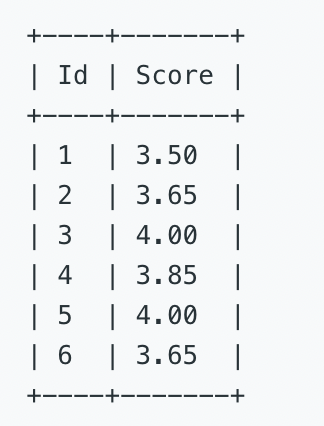


For example, given the above Scores table, your query should generate the following report (order by highest score):
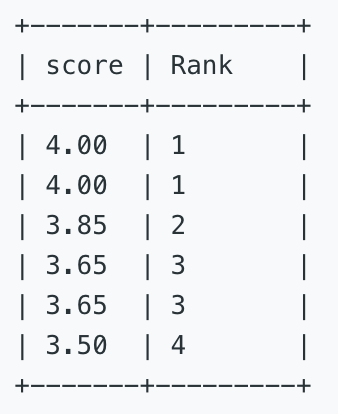

In [9]:
Scores = pd.DataFrame({"Id":list(range(1,7)),
                     "Score":[3.5,3.65,4,3.85,4,3.65]})
Scores

,Id,Score
0,1,3.50
1,2,3.65
2,3,4.00
3,4,3.85
4,5,4.00
5,6,3.65


To rank our numbers, `rank` function is a powerful tool to handle any situation in which we need to rank something.

rank(ascending=True,method="dense/max_rank/min_rank/averaeg/")

In [10]:
Scores["Rank"] = Scores["Score"].rank(ascending=False,method="dense")
Scores[["Score","Rank"]].sort_values(by="Rank")

,Score,Rank
2,4.00,1.0
4,4.00,1.0
3,3.85,2.0
1,3.65,3.0
5,3.65,3.0
0,3.50,4.0


### Question 4: Consecutive Numbers
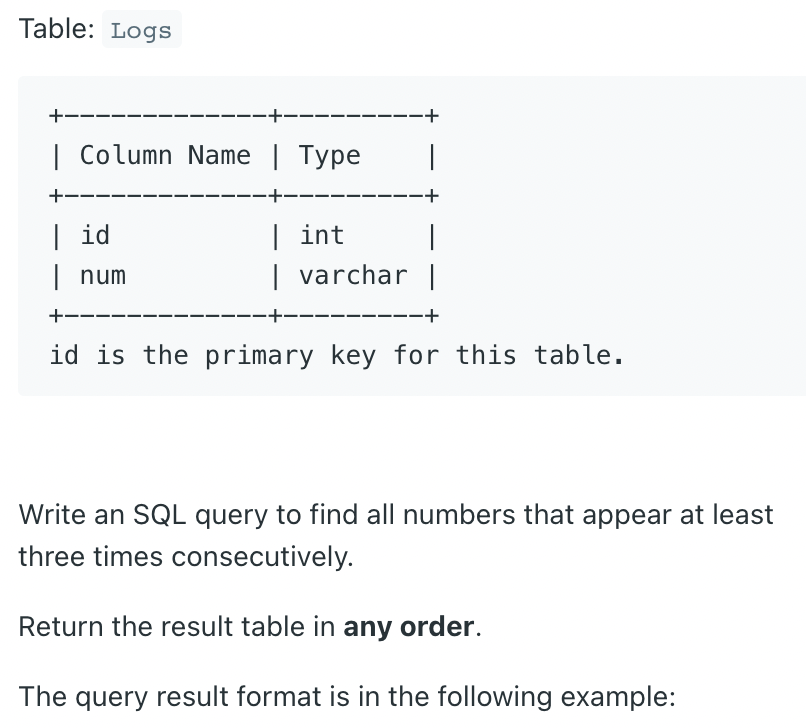

In [11]:
Logs = pd.DataFrame({"Id":np.arange(1,23),
             "Num":[1,1,1,2,1,2,2,2,1,1,1,2,2,2,3,3,3,4,1,3,3,3]})
Logs

,Id,Num
0,1,1
1,2,1
2,3,1
3,4,2
4,5,1
5,6,2
6,7,2
7,8,2
8,9,1
9,10,1


In [14]:
def Consecutive_Nums(df,column="Num"):
    sample_size = len(df[column])
    Num_List = df[column].tolist()
    ConsecutiveNums = []
    for i in range(sample_size-2):
        if Num_List[i] == Num_List[i+1] and Num_List[i+1] == Num_List[i+2]:
            ConsecutiveNums.append(Num_List[i])
    ConsecutiveNums_set = list(set(ConsecutiveNums))
    return ConsecutiveNums_set

In [16]:
Consecutive_Nums(Logs,column="Num")

[1, 2, 3]

### Question 5 Employees Earning More Than Their Managers

The Employee table holds all employees including their managers. Every employee has an Id, and there is also a column for the manager Id.

In [23]:
Employee = pd.DataFrame({"Id":list(range(1,5)),
                        "Name":["Joe","Henry","Sam","Max"],
                        "Salary":[70000,80000,60000,90000],
                        "ManagerId":[3,4,np.nan,np.nan]})
Employee

,Id,Name,Salary,ManagerId
0,1,Joe,70000,3.0
1,2,Henry,80000,4.0
2,3,Sam,60000,NaN
3,4,Max,90000,NaN


Given the `Emloyee` table, using python to find out employees who earn more than manager. For the above table, Joe is the only employee who earns more than his manager.

In [29]:
merged_df = pd.merge(left=Employee,right=Employee,left_on="ManagerId",right_on="Id",
                    suffixes=("_employee","_manager"))
merged_df

,Id_employee,Name_employee,Salary_employee,ManagerId_employee,Id_manager,Name_manager,Salary_manager,ManagerId_manager
0,1,Joe,70000,3.0,3,Sam,60000,NaN
1,2,Henry,80000,4.0,4,Max,90000,NaN


In [37]:
# filter out employees whose salary is greater than that of manager
boolean_condition = merged_df["Salary_employee"] > merged_df["Salary_manager"]
Employee_Higher_sal = merged_df[boolean_condition][["Name_employee"]].rename(columns={"Name_employee":"Employee"})
Employee_Higher_sal

,Employee
0,Joe


### Question 6 Duplicate Emails

Using python to find all duplicate emails in a table named `Person`

In [62]:
Person = pd.DataFrame({"Id":[1,2,3],
             "Email":["a@b.com","c@d.com","a@b.com"]})
Person

,Id,Email
0,1,a@b.com
1,2,c@d.com
2,3,a@b.com


For example, your query should return the following for the above table:

In [69]:
cnt_df = Person.groupby("Email").count()
email = cnt_df.loc[cnt_df["Id"]>1,"Id"].index.tolist()
pd.DataFrame({"Email":email})

,Email
0,a@b.com


### Question 7 Customers Who Never Order

Suppose that a website contains two tables, the `customers` table and the `orders` table. Using python to wirte a program that finds all customers who never order anything.

In [70]:
Customers = pd.DataFrame({"Id":[1,2,3,4],
             "Name":["Joe","Henry","Sam",'Max']})
Customers

,Id,Name
0,1,Joe
1,2,Henry
2,3,Sam
3,4,Max


In [71]:
Orders = pd.DataFrame({"Id":[1,2],
             "CustomerId":[3,1]})
Orders

,Id,CustomerId
0,1,3
1,2,1


If we want to find customers that never order, we need to look at orders table that contains informaiton about orders of customers.

In [98]:
mask = Customers["Id"].isin(Orders["CustomerId"])
Customers_no_Order = Customers.loc[~mask][["Name"]]
Customers_no_Order

,Name
1,Henry
3,Max


### Question 8: Department Highest Salary

The `Employee` table holds all employees. Every employee has an Id, a salary, and there is also a column for the department Id.

In [129]:
Employee = pd.DataFrame({"Id":[1,2,3,4,5],
             "Name":["Joe","Jim","Henry","Sam","Max"],
             "Salary":[70000,90000,80000,60000,90000],
             "DepartmentId":[1,1,2,2,1]})
Employee

,Id,Name,Salary,DepartmentId
0,1,Joe,70000,1
1,2,Jim,90000,1
2,3,Henry,80000,2
3,4,Sam,60000,2
4,5,Max,90000,1


In [130]:
Department = pd.DataFrame({"Id":[1,2],
             "Name":["IT","Sales"]})
Department

,Id,Name
0,1,IT
1,2,Sales


Using python to find employees who have the highest salary in each of the departments. For the above tables, your SQL query should return the following rows (order of rows does not matter).

In [133]:
Employee_copy = Employee.copy()
Employee_copy["Rank"] = Employee_copy["Salary"].groupby(Employee_copy["DepartmentId"]).rank(method="dense",ascending=False)
# merge emp table with dept table
merged_df = pd.merge(Employee_copy,Department,left_on="DepartmentId",right_on="Id",how='inner',
                    suffixes=("_emp","_dept"))
merged_df

,Id_emp,Name_emp,Salary,DepartmentId,Rank,Id_dept,Name_dept
0,1,Joe,70000,1,2.0,1,IT
1,2,Jim,90000,1,1.0,1,IT
2,5,Max,90000,1,1.0,1,IT
3,3,Henry,80000,2,1.0,2,Sales
4,4,Sam,60000,2,2.0,2,Sales


In [135]:
# filter out employees with highest salary and rename the datafrmae
HighestSal_emp = merged_df.loc[Employee_copy["Rank"] == 1].rename(columns={"Name_emp":"Employee",
                                                                     "Name_dept":"Department",})
HighestSal_emp

,Id_emp,Employee,Salary,DepartmentId,Rank,Id_dept,Department
1,2,Jim,90000,1,1.0,1,IT
2,5,Max,90000,1,1.0,1,IT
4,4,Sam,60000,2,2.0,2,Sales


In [136]:
# select the required columns from the dataframe
HighestSal_emp[["Department","Employee","Salary"]]

,Department,Employee,Salary
1,IT,Jim,90000
2,IT,Max,90000
4,Sales,Sam,60000


### Question 9: Department Top Three Salaries

`Employee`
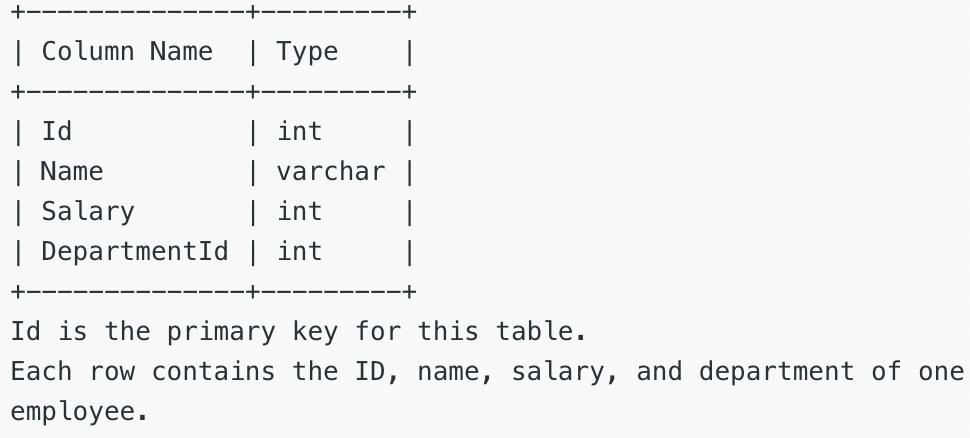

`Department`
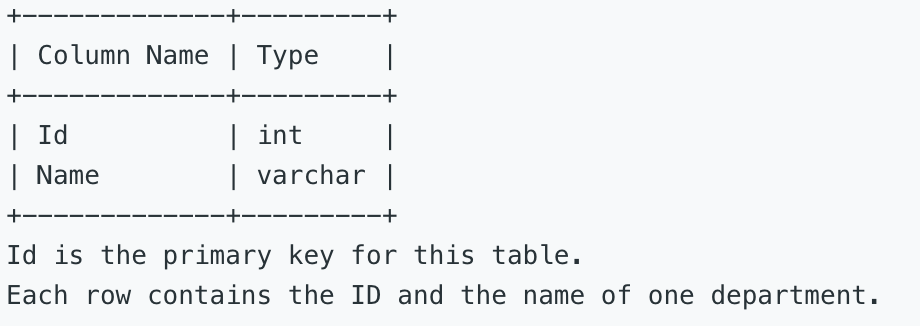
A company's executives are interested in seeing who earns the most money in each of the company's departments. A high earner in a department is an employee who has a salary in the top three unique salaries for that department.

Using python to find the employees who are high earners in each of the departments.

Return the result table in any order.

The query result format is in the following example:

**Interpretation**

This question requires us to find out the employees with top three unoquely highest salaries. (This can be achieved by `rank` function)

This suggests that we need to rank the salary of all employees within each department. (Rank employees within each department can be solved by `groupby` function)

In [145]:
# let's create the example dataframe for manipulation
Employee = pd.DataFrame({"Id":np.arange(1,8),
              "Name":["Joe","Henry","Sam","Max","Janet","Randy","Will"],
              "Salary":[85000,80000,60000,90000,69000,85000,70000],
             "DepartmentId":[1,2,2,1,1,1,1]})
Employee   

,Id,Name,Salary,DepartmentId
0,1,Joe,85000,1
1,2,Henry,80000,2
2,3,Sam,60000,2
3,4,Max,90000,1
4,5,Janet,69000,1
5,6,Randy,85000,1
6,7,Will,70000,1


In [141]:
Department = pd.DataFrame({"Id":[1,2],
             "Name":["IT","Sales"]})
Department

,Id,Name
0,1,IT
1,2,Sales


**Step 1: rank all employees based on their salary**

In [153]:
Emp_Rank = Employee["Salary"].groupby(Employee["DepartmentId"]).rank(ascending=False,method="dense")
#Employee["Rank"] = Emp_Rank
Employee["Rank"] = Emp_Rank
Employee

,Id,Name,Salary,DepartmentId,Rank
0,1,Joe,85000,1,2.0
1,2,Henry,80000,2,1.0
2,3,Sam,60000,2,2.0
3,4,Max,90000,1,1.0
4,5,Janet,69000,1,4.0
5,6,Randy,85000,1,2.0
6,7,Will,70000,1,3.0


**Setp 2: merge the rank table with the dept table to query the dept information**

In [162]:
merged_df = pd.merge(Employee,Department,left_on="DepartmentId",right_on="Id",suffixes=("_emp","_dept"))
merged_df

,Id_emp,Name_emp,Salary,DepartmentId,Rank,Id_dept,Name_dept
0,1,Joe,85000,1,2.0,1,IT
1,4,Max,90000,1,1.0,1,IT
2,5,Janet,69000,1,4.0,1,IT
3,6,Randy,85000,1,2.0,1,IT
4,7,Will,70000,1,3.0,1,IT
5,2,Henry,80000,2,1.0,2,Sales
6,3,Sam,60000,2,2.0,2,Sales


**Step 3: filter out employees who have the top 3 uniquely highest salaries**

In [165]:
top3_emp = merged_df[merged_df["Rank"].isin([1,2,3])][["Name_dept","Name_emp","Salary"]].rename(columns={"Name_dept":"Department",
                                                          "Name_emp":"Emplpyee"})
top3_emp.sort_values(by=["Department","Salary"],
                     ascending=[True,False],
                    inplace=True)
top3_emp

,Department,Emplpyee,Salary
1,IT,Max,90000
0,IT,Joe,85000
3,IT,Randy,85000
4,IT,Will,70000
5,Sales,Henry,80000
6,Sales,Sam,60000
